In [1]:
import pprint

import numpy as np
np.random.seed(17) # fix NumPy random number generator seed

import matplotlib.pyplot as plt

# add some relative paths so we can import sampling.py module.
import sys
sys.path.append("../")
sys.path.append("../src")
sys_path = sys.path

import sampling

The energy of the system with $n$ nodes in some `spin_config` $x \in \{-1, +1\}^n$ is 
\begin{equation}
H(x) = -\sum_{i ~ j} J_{ij} x_i x_j - \sum_i B_i x_i
\end{equation}

* $B_i$ is the external magnetic field on node $i$
* For notation: we say that $i ~ j$ if there is an edge between node $i$ and node $j$.
* $J_{ij}$ is the coupling strength between nodes $i$ and $j$
  * if $J_{ij} > 0$ for all edges, then the system is ``ferromagnetic''
  * if $J_{ij} < 0$ for all edges, then the system is ``antiferromagnetic''
  * if the values of $J$ are randomly positive or negative, then the system is a ``spin glass'' system.  

The method `sampling.Graph.get_energy()` calculates the value $H$ given the current spin configuration of the `sampling.Graph` object.



The *probability* that the system is in some spin configuration $x$ is

\begin{equation}
P(x) = \frac{1}{Z} e^{-\beta H(x)}
\end{equation}

Where 
* $\beta = (k_B T)^{-1}$ 
* $k_B$ is the Boltzmann constant, which in our benchmark_instances we commonly set to 1.0.
* $T>0$ is the system temperature.
* $Z$ is the partition function defined as $Z = \sum_x e^{-\beta H(x)}$.  The summation runs over all $2^n$ spin configurations $x$ and so calculating $Z$ directly is intractable for large systems.  A vector of 64-bit floating point numbers of length $2^30$ is already over 8GB.

As the system temperature $T$ approaches 0, long-range correlation between all nodes is pervasive and finding a minimum energy spin configuration is challenging for arbitrary antiferromagnetic and spin-glass systems.

The following code block shows some examples of setting a `spin_config` and calculating the energy of the system.


Graph UUID: 85f2e0b1-1812-49da-80c7-26a256511da2


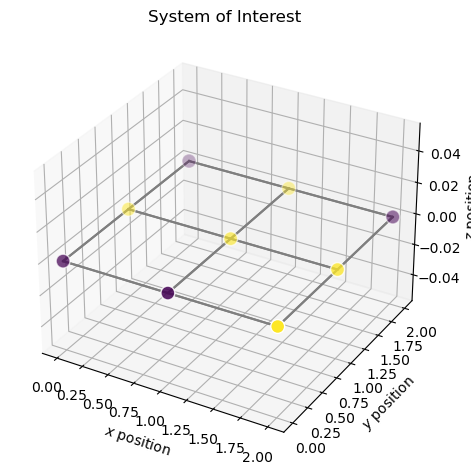

J (couplings):
{(0, 1): 1.0,
 (0, 2): 1.0,
 (0, 3): 1.0,
 (0, 6): 1.0,
 (1, 2): 1.0,
 (1, 4): 1.0,
 (1, 7): 1.0,
 (2, 5): 1.0,
 (2, 8): 1.0,
 (3, 4): 1.0,
 (3, 5): 1.0,
 (3, 6): 1.0,
 (4, 5): 1.0,
 (4, 7): 1.0,
 (5, 8): 1.0,
 (6, 7): 1.0,
 (6, 8): 1.0,
 (7, 8): 1.0}
B (external field): [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Current spin configuration is: [-1.  1. -1. -1.  1.  1.  1.  1. -1.]
Energy of the system is: 1.9


In [2]:
filename = "../benchmark_instances/instance.a8be0d9a-3238-11ee-b3fb-9309595bcf35.EXAMPLE.json"

G = sampling.load_graph_instance_from_file(filename)
print("Graph UUID:", G.uuid)


n = len(G.nodes())
spin_config = sampling.generate_random_spin_config(n)
G.set_spins(spin_config)
G.plot()



print("J (couplings):")
pprint.pprint(G.get_couplings())
print("B (external field):", G.get_external_field())
print("Current spin configuration is:", G.get_spins())
print("Energy of the system is:", G.get_energy())

